In [53]:
# EDA
import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Otimization of hyperparameters
import optuna

In [54]:
# Load dataset
df_segmento = pd.read_csv('./datasets/dataset_segmento_clientes.csv')

### EDA

In [55]:
# Visualize the first 10 rows
df_segmento.head(10)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [56]:
# Information about the dataset
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [57]:
# Possible values - Categorical variables
df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [58]:
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [59]:
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [60]:
# Distribution of the target variable
contagem_target = df_segmento['segmento_de_cliente'].value_counts()
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [61]:
# Create ordenate list of the target variable
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [62]:
# Distruibution of the target variable - Contagem
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

c:\Users\ranie\.virtualenvs\decision_tree-pcWFl_8G\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [63]:
# Distribution of the target variable - Percentage
px.pie(contagem_target, values=contagem_target, names=contagem_target.index)

In [64]:
# Distribution of variable 'atividade_economica'
percentual_atividade = df_segmento['atividade_economica'].value_counts(normalize=True) * 100
px.bar(percentual_atividade, color=percentual_atividade.index)

c:\Users\ranie\.virtualenvs\decision_tree-pcWFl_8G\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [65]:
# Distribution of variable 'inovação'
percentual_inovacao = df_segmento['inovacao'].value_counts(normalize=True) * 100
px.bar(percentual_inovacao, color=percentual_inovacao.index)

In [66]:
# Contingency table - 'localizacao' and target variable
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)

tabela_localizacao.show()

In [67]:
# Contingency table - 'atividade' and target variable
crosstab_atividade = pd.crosstab(df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_atividade = ff.create_table(crosstab_atividade)

tabela_atividade.show()

In [68]:
# Contingency table - 'inovacao' and target variable
crosstab_inovacao = pd.crosstab(df_segmento['inovacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_inovacao = ff.create_table(crosstab_inovacao)

tabela_inovacao.show()

In [69]:
# Distribution Idade da Empresa
px.histogram(df_segmento, x='idade')

In [70]:
# Distribution Faturamento
px.histogram(df_segmento, x='faturamento_mensal')

In [71]:
# BoxPlot between 'segmento_de_cliente' and 'idade'
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

c:\Users\ranie\.virtualenvs\decision_tree-pcWFl_8G\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [72]:
# Test Qui-Quadrado of Pearson
# H0: There is no association between the variables
# H1: There is association between the variables
value_expected, value_observed, stats = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'localizacao')

c:\Users\ranie\.virtualenvs\decision_tree-pcWFl_8G\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\ranie\.virtualenvs\decision_tree-pcWFl_8G\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.



In [73]:
# Value expected
value_expected

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,44.844,52.924,48.884,55.348
Gold,3.552,4.192,3.872,4.384
Silver,57.720,68.120,62.920,71.240
Starter,4.884,5.764,5.324,6.028


In [74]:
# Value observed
value_observed

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,39,62,45,56
Gold,4,3,5,4
Silver,63,60,65,72
Starter,5,6,6,5


In [75]:
# Stats
stats.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,5.19335,9.0,0.81714,0.05884,0.11369
1,cressie-read,0.66667,5.19198,9.0,0.81726,0.05883,0.11367
2,log-likelihood,0.00000,5.19713,9.0,0.81680,0.05886,0.11374
3,freeman-tukey,-0.50000,5.20798,9.0,0.81581,0.05892,0.11390
4,mod-log-likelihood,-1.00000,5.22494,9.0,0.81428,0.05902,0.11414
5,neyman,-2.00000,5.27777,9.0,0.80945,0.05932,0.11490


### Training Model

In [76]:
# Separar X e y
X = df_segmento.drop(columns='segmento_de_cliente')
y = df_segmento['segmento_de_cliente']

In [77]:
# Pipeline
# OneHotEncoder - Categorical variables

# List of categorical variables
categorical_features = ['atividade_economica', 'localizacao']

# Create a transformer for categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)
])

# Create a pipeline
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

### Cross-Validation

In [78]:
# Training the model cross-validation using StratifiedKFold

cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)
metrics_result = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)

In [79]:
# Show the results
metrics_result

{'fit_time': array([0.00299931, 0.0035758 , 0.00300241]),
 'score_time': array([0.00199938, 0.00099993, 0.00199986]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [80]:
# Mean of accuracy, considering the 3 folds
metrics_result['test_accuracy'].mean()

0.4739917754851743

In [81]:
# Accuracy
# All of correct predictions / All of predictions

### Metrics of the model

In [82]:
# Make predictions using cross-validation
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [83]:
# Avaliation of the model
classification_report_str = classification_report(y, y_pred)

print(f"Classification Report: \n{classification_report_str}")

Classification Report: 
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



c:\Users\ranie\.virtualenvs\decision_tree-pcWFl_8G\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ranie\.virtualenvs\decision_tree-pcWFl_8G\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\ranie\.virtualenvs\decision_tree-pcWFl_8G\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



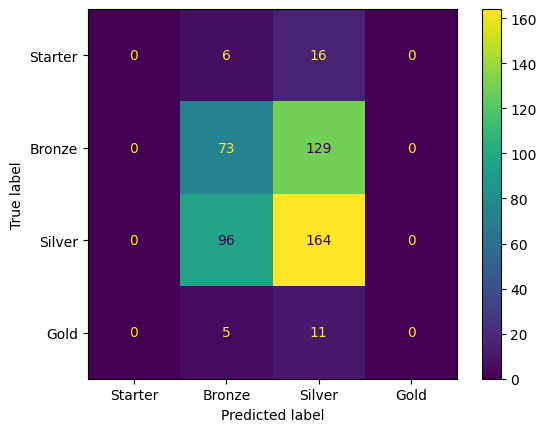

In [86]:
# Matrix of confusion
cm = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lista_segmentos)
disp.plot()

### Tuning of hyperparameters

In [88]:
# Adjusting hyperparameters using Optuna
# min_samples_left - Minimum number of samples required to be at a leaf node
# max_depth - Maximum depth of the tree

def decisiontree_optuna(trial):
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_depth = trial.suggest_int('max_depth', 2, 8)
    
    dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
    dt_model.set_params(classifier__max_depth=max_depth)
    
    scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring='accuracy')
    
    return scores.mean()

In [89]:
# Execute automation of hyperparameters
study_decisiontree = optuna.create_study(direction='maximize')
study_decisiontree.optimize(decisiontree_optuna, n_trials=100)

[I 2024-02-09 07:51:09,581] A new study created in memory with name: no-name-dba8176c-830b-48ec-a0e6-2e430f109a6a
[I 2024-02-09 07:51:09,600] Trial 0 finished with value: 0.4740518962075848 and parameters: {'min_samples_leaf': 4, 'max_depth': 2}. Best is trial 0 with value: 0.4740518962075848.
[I 2024-02-09 07:51:09,616] Trial 1 finished with value: 0.4699877353726283 and parameters: {'min_samples_leaf': 4, 'max_depth': 3}. Best is trial 0 with value: 0.4740518962075848.
[I 2024-02-09 07:51:09,632] Trial 2 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 5, 'max_depth': 6}. Best is trial 0 with value: 0.4740518962075848.
[I 2024-02-09 07:51:09,647] Trial 3 finished with value: 0.4699877353726283 and parameters: {'min_samples_leaf': 9, 'max_depth': 3}. Best is trial 0 with value: 0.4740518962075848.
[I 2024-02-09 07:51:09,663] Trial 4 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 10, 'max_depth': 5}. Best is trial 0 with value:

In [91]:
# Show the best hyperparameters
print(f'Best accuracy: {study_decisiontree.best_value}')
print(f'Best parameters: {study_decisiontree.best_params}')

Best accuracy: 0.4740518962075848
Best parameters: {'min_samples_leaf': 4, 'max_depth': 2}


### Show tree

In [93]:
# Prepare the data collection to training and visualize the tree
X_train_tree = X.copy()
X_train_tree['localizacao_label'] = X_train_tree.localizacao.astype('category').cat.codes
X_train_tree['atividade_economica_label'] = X_train_tree.atividade_economica.astype('category').cat.codes
X_train_tree.drop(columns=['localizacao', 'atividade_economica'], axis=1, inplace=True)
X_train_tree.rename(columns={'localizacao_label': 'localizacao', 'atividade_economica_label': 'atividade_economica'}, inplace=True)
X_train_tree.head(10)


,faturamento_mensal,numero_de_funcionarios,idade,inovacao,localizacao,atividade_economica
0,713109.95,12,6,1,1,1
1,790714.38,9,15,0,2,1
2,1197239.33,17,4,9,2,1
3,449185.78,15,6,0,2,2
4,1006373.16,15,15,8,2,0
5,1629562.41,16,11,4,1,3
6,771179.95,13,0,1,3,3
7,707837.61,16,10,6,2,3
8,888983.66,17,10,1,0,1
9,1098512.64,13,9,3,1,2


In [94]:
# Training the model with the best hyperparameters

clf_decisiontree = DecisionTreeClassifier(min_samples_leaf=study_decisiontree.best_params['min_samples_leaf'], max_depth=study_decisiontree.best_params['max_depth'])
y_train_tree = y.copy()

clf_decisiontree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4)

[Text(0.5, 0.8333333333333334, 'inovacao <= 2.5\ngini = 0.563\nsamples = 500\nvalue = [202, 16, 260, 22]\nclass = Silver'),
 Text(0.25, 0.5, 'faturamento_mensal <= 425959.422\ngini = 0.482\nsamples = 165\nvalue = [112, 0, 35, 18]\nclass = Starter'),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [2, 0, 0, 11]\nclass = Gold'),
 Text(0.375, 0.16666666666666666, 'gini = 0.421\nsamples = 152\nvalue = [110, 0, 35, 7]\nclass = Starter'),
 Text(0.75, 0.5, 'faturamento_mensal <= 549601.438\ngini = 0.474\nsamples = 335\nvalue = [90.0, 16.0, 225.0, 4.0]\nclass = Silver'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 37\nvalue = [26, 0, 7, 4]\nclass = Starter'),
 Text(0.875, 0.16666666666666666, 'gini = 0.416\nsamples = 298\nvalue = [64.0, 16.0, 218.0, 0.0]\nclass = Silver')]

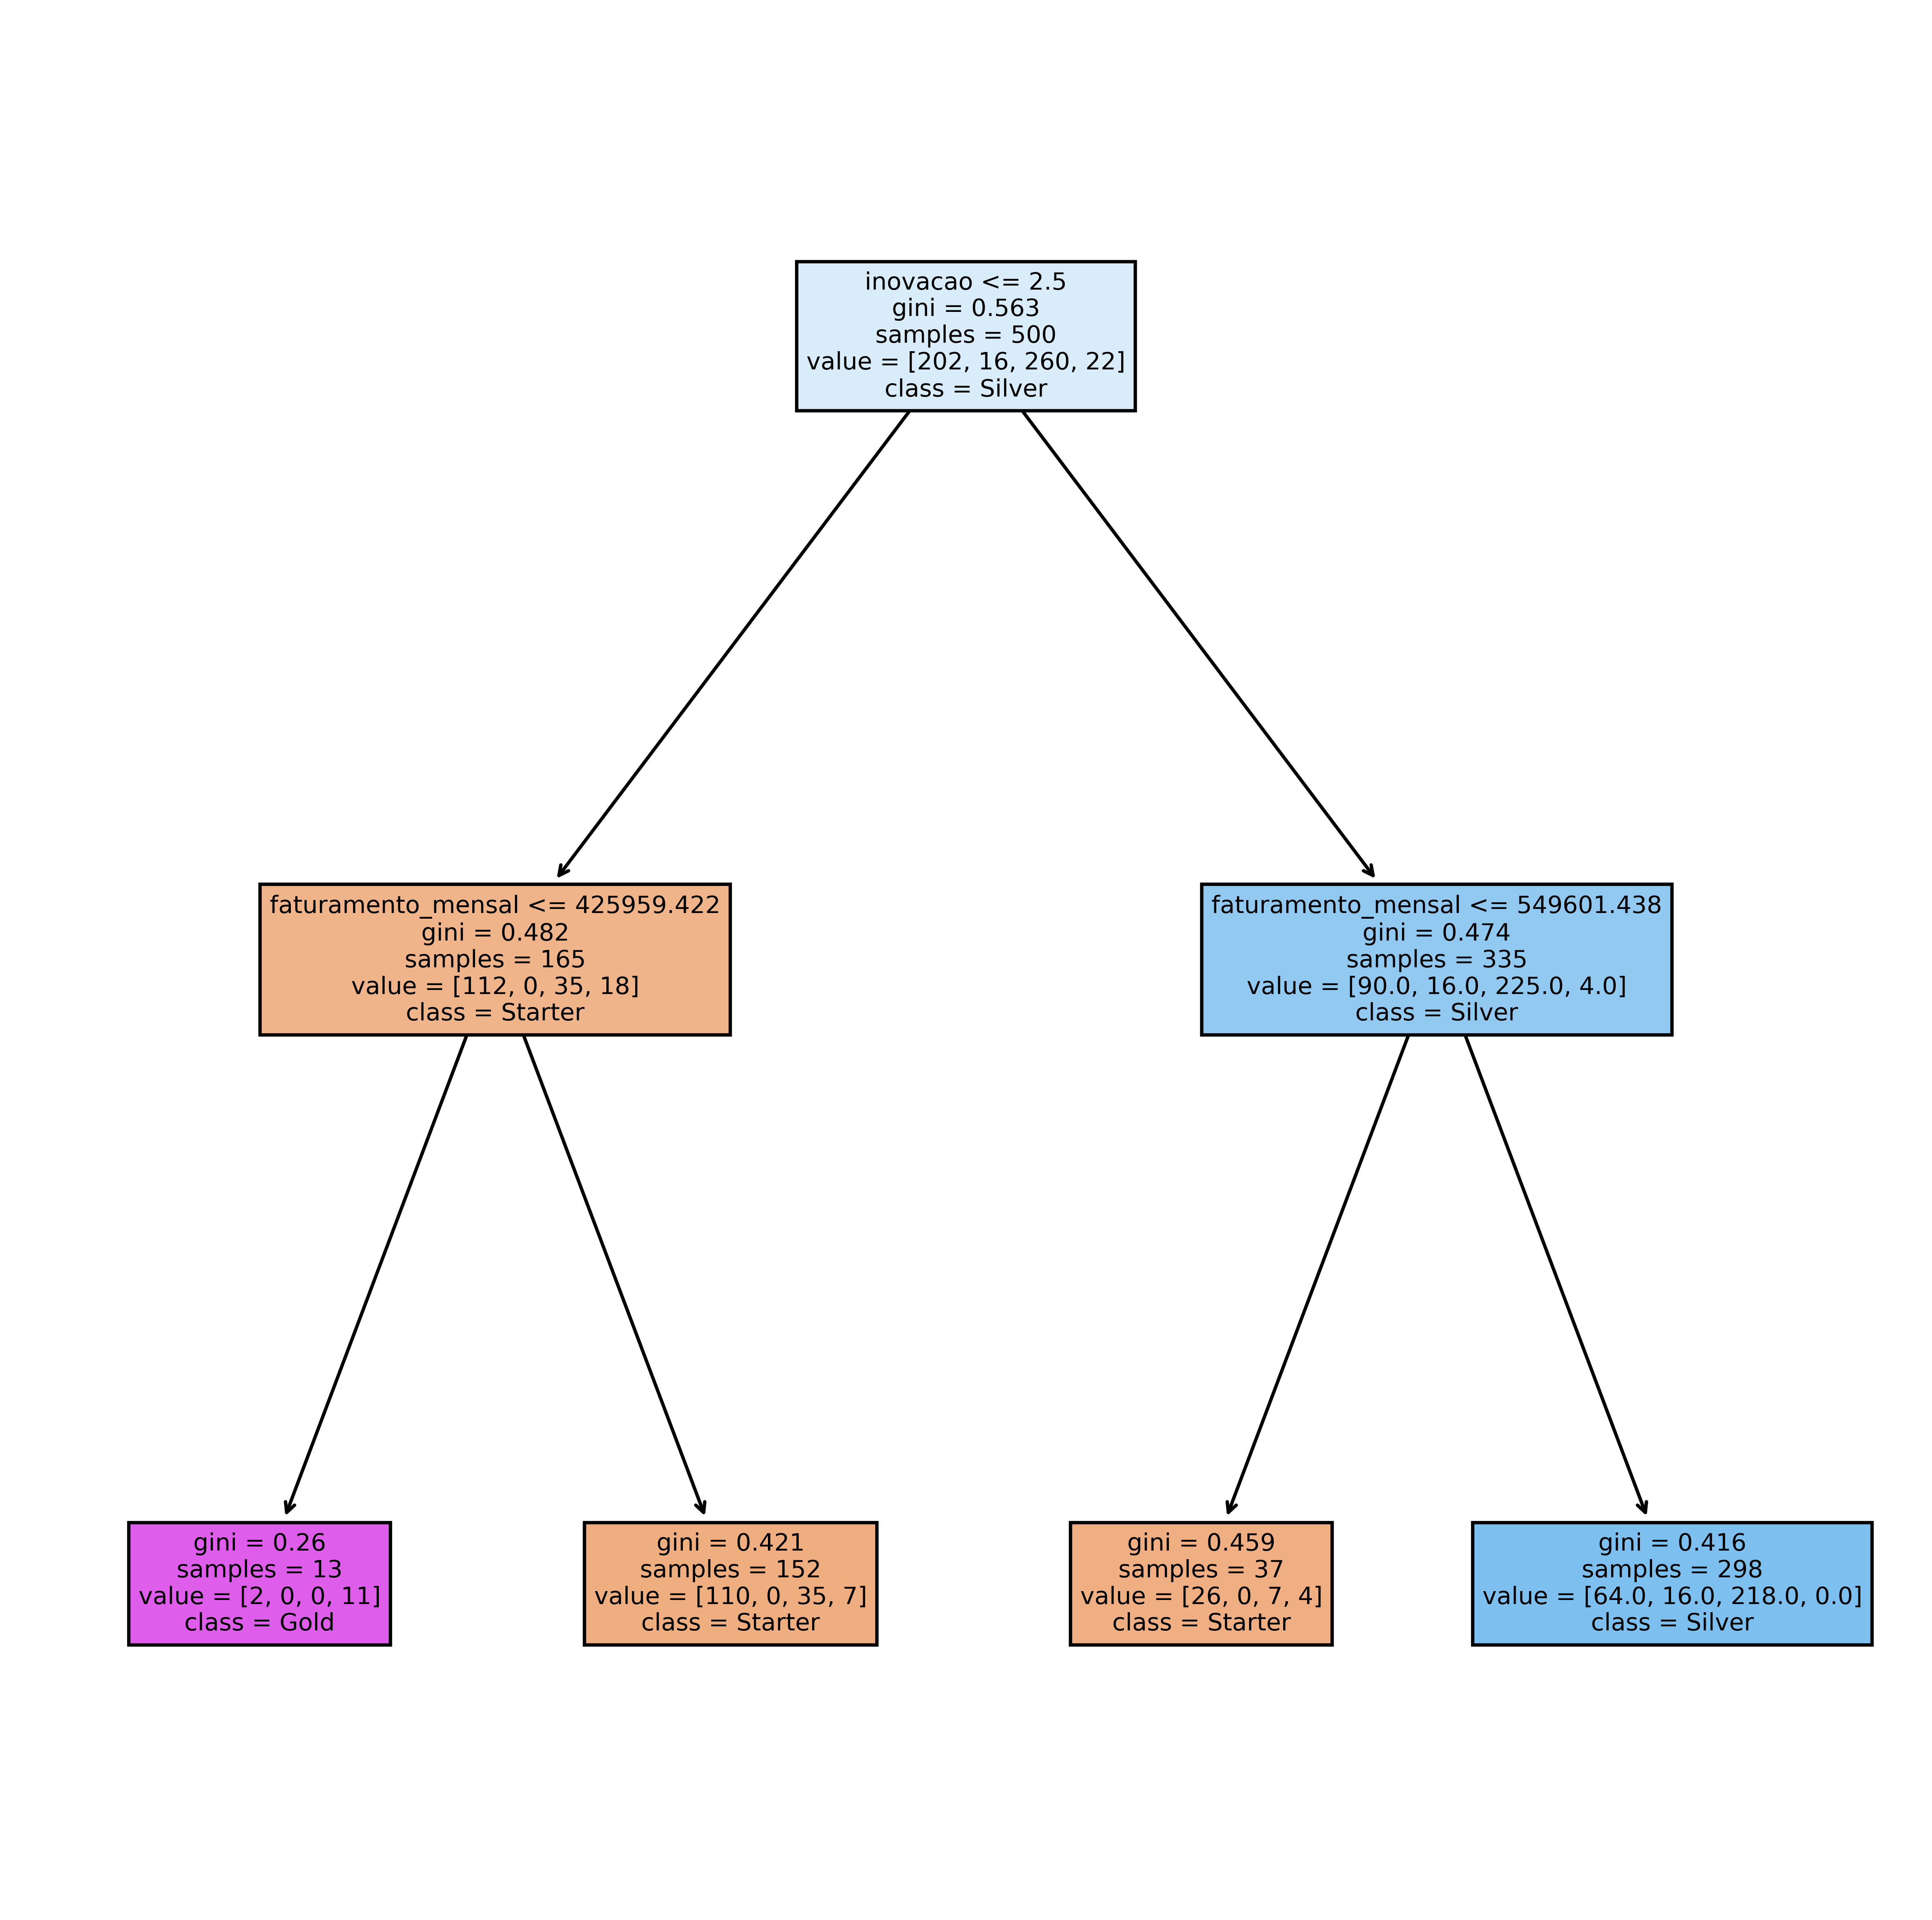

In [95]:
# Visualize the decision tree with Plot Tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=600)

plot_tree(
    clf_decisiontree,
    feature_names=X_train_tree.columns.to_numpy(),
    class_names=lista_segmentos,
    filled=True
)